# Working with Missing data in pandas

In [3]:
import pandas as pd
import numpy as np

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration.

In [4]:
incomplete_df = pd.DataFrame({'id': [1,2,3,2,2,3,1,1,1,2,4],
                              'type': ['one', 'one', 'two', 'three', 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345,928,np.NAN,645,113,942,np.NAN,539,np.NAN,814,np.NAN] 
                             }, columns=['id','type','amount'])

Column 'amount' is the only one with missing values. Now we display the dataframe

In [5]:
#TODO: display the dataframe
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


Recall that summary statistics and arithmetic with missing data is natively supported by pandas. Let's define two series, both containing some missing values.

In [6]:
A = incomplete_df['amount']
B = pd.Series(data=[np.NAN,125,335,345,312,np.NAN,np.NAN,129,551,800,222])

In [7]:
#TODO: print the content of A
print(A)
print ('\n')


#TODO: print the content of B
print(B)


0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


The mean is computed normally and missing values are ignored:

In [8]:
# TODO: Compute and print the mean value of A
print("A : Mean =" , A.mean())

A : Mean = 618.0


Min, Max, STD and Variance all work even when data are missing:

In [9]:
# TDOD: Compute and display the min, max, standard deviation and variance of B
B.describe()


count      8.000000
mean     352.375000
std      226.904598
min      125.000000
25%      198.750000
50%      323.500000
75%      396.500000
max      800.000000
dtype: float64

In [10]:
#Variance
B.var()

51485.69642857143

We can also perform element-wise arithmetic operations between series with missing data. Note that by definition the result of any operation that involves missing values is NaN.

In [11]:
# TODO: Perform element-wise addition between the values in A and B
C = A + B

for i in range(0, len(C)):
    print(i, "  |  ", A[i],"  |  ", B[i],"  |  ", C[i])

0   |   345.0   |   nan   |   nan
1   |   928.0   |   125.0   |   1053.0
2   |   nan   |   335.0   |   nan
3   |   645.0   |   345.0   |   990.0
4   |   113.0   |   312.0   |   425.0
5   |   942.0   |   nan   |   nan
6   |   nan   |   nan   |   nan
7   |   539.0   |   129.0   |   668.0
8   |   nan   |   551.0   |   nan
9   |   814.0   |   800.0   |   1614.0
10   |   nan   |   222.0   |   nan


### Filling missing values

Recall that pandas has a function that allows you to drop any rows in a dataframe (or elements in a series) that contain a missing value.

In [12]:
# TODO: Print the values of attribute A before removing the null values
print("Original dataframe \n", A)
print("\n \n")
# TODO: now, print the values of A but without the null values 
print("Removed Null/NAN \n", A.dropna())


Original dataframe 
 0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64

 

Removed Null/NAN 
 0    345.0
1    928.0
3    645.0
4    113.0
5    942.0
7    539.0
9    814.0
Name: amount, dtype: float64


However, very often you may wish to fill in those missing values rather than simply dropping them. Of course, pandas also has that functionality. For example, we could fill missing values with a scalar number, as shown below.

In [13]:
# TODO: replace the missing value with -99
A.fillna(-99)

0     345.0
1     928.0
2     -99.0
3     645.0
4     113.0
5     942.0
6     -99.0
7     539.0
8     -99.0
9     814.0
10    -99.0
Name: amount, dtype: float64

That actually works with any data type.

In [14]:
# TODO: fill the missing values with the string 'unknown'
A.fillna("unkown")

0        345
1        928
2     unkown
3        645
4        113
5        942
6     unkown
7        539
8     unkown
9        814
10    unkown
Name: amount, dtype: object

As such, we can use this functionality to fill in the gaps with the average value computed across the non-missing values.

In [15]:
# TODO: replace the missing values with the average value of the non-missing values
A.fillna(A.mean())


0     345.0
1     928.0
2     618.0
3     645.0
4     113.0
5     942.0
6     618.0
7     539.0
8     618.0
9     814.0
10    618.0
Name: amount, dtype: float64

Even better, if we want to fill in the gaps with mean values of corresponding *id's* (recall our initial dataframe printed below), the following two lines of code perform that seemingly complex task.

In [16]:
# Fill in gaps in the 'amount' column with means obtained from corresponding id's in the first column
df = incomplete_df.copy() # always use copy, to avoid changes reflects in both dfs
avg = df.groupby(['id']).mean() # mean grouped by ID

# Completing missing values in column Amount within average values from ID
for i in range(len(df)):
    if pd.isnull(df['amount'][i]) == True:
        id1 = df.loc[i, 'id'] #look for index position (ID`s number)
       
        df['amount'][i] = avg.loc[id1] #change value of ID index i, with value from that avg

#TODO: display the dataframe. What do you see?
# ANswer: id 4 dont have any value, so we can`t use the mean.
print("avg means of each id", avg)
print("\n \n")
print("Original DF \n", incomplete_df)
print("\n \n")
print("Df w/o missing values \n", df)


avg means of each id     amount
id        
1    442.0
2    625.0
3    942.0
4      NaN

 

Original DF 
     id   type  amount
0    1    one   345.0
1    2    one   928.0
2    3    two     NaN
3    2  three   645.0
4    2    two   113.0
5    3  three   942.0
6    1    one     NaN
7    1    two   539.0
8    1    one     NaN
9    2  three   814.0
10   4    one     NaN

 

Df w/o missing values 
     id   type  amount
0    1    one   345.0
1    2    one   928.0
2    3    two   942.0
3    2  three   645.0
4    2    two   113.0
5    3  three   942.0
6    1    one   442.0
7    1    two   539.0
8    1    one   442.0
9    2  three   814.0
10   4    one     NaN


<ipython-input-16-c86eea238078>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'][i] = avg.loc[id1] #change value of ID index i, with value from that avg


In [76]:
incomplete_df["amount"].fillna(incomplete_df.groupby("id")["amount"].transform("mean"),inplace=True)
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,942.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,442.0
7,1,two,539.0
8,1,one,442.0
9,2,three,814.0


In [17]:
# TODO: If there is no corresponding id and the cell is still null, simply use the overall mean
df.fillna(df['amount'].mean(), inplace=True) #change existing df with inplace = True
df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,942.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,442.0
7,1,two,539.0
8,1,one,442.0
9,2,three,814.0


You can fill values forwards and backwards with the flags *pad* / *ffill* and *bfill* / *backfill*

In [24]:
# TODO: fill the missing values in B with the values in the previous records (no limit)
print (B)
print ('\n')    # line to separate the output
B.fillna(method = 'pad')

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64




0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5     312.0
6     312.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

We can set a limit if we only want to replace consecutive gaps.

In [25]:
# TODO: fill the missing values in B with the value in the next record (the value of a record can be used in the next record only)
print (B)
print ('\n')    # line to separate the output
B.fillna(method = 'ffill', limit = 1)

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64




0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5     312.0
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

### Outlier detection

We can use the data pid.csv to practice on outlier detection

In [82]:
# TODO: read the csv file pid

df = pd.read_csv("pid.csv")
df

,A,B,C,D,E,F,G,H,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
# TODO: for each column except the label column, compute the standard deviation of the columns


df.describe() # Look that every colum has values (Max >>> std)

,A,B,C,D,E,F,G,H,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [84]:
df.isna().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
Label    0
dtype: int64

In [86]:
# Loop for to run every column and create a list with outliers
df2 = df.iloc[:,0:8].copy() #selecting every colum except "Label"
outliers = {}

dic = {}
# j = column number, i = row number
for j in range(0,len(df2.columns)):
    print('Column', df2.iloc[:,j].name, "------------------------")
    listvalues = []
    
    
    for i in range(0,len(df2)): #look in every column
        # test for VALUE > mean - 3* STD OR VALUE < -3* STD 
        if( ((df2.iloc[i,j]) > ( df2.iloc[:,j].mean()  + df2.iloc[:,j].std() * 3)) |  ((df2.iloc[i,j]) < ( df2.iloc[:,j].mean()  - df2.iloc[:,j].std() * 3))):
            
            if(listvalues.count(df2.iloc[i,j]) == 0):#check if value already on that list USE THIS IF U WANNA WITHOUT REPETION
                 listvalues.append(df2.iloc[i,j])   #Add each value in that list
        #print(df2.iloc[i,0])
    dic[df2.iloc[:,j].name] = listvalues #add each volum as a KEY
    print(dic[df2.iloc[:,j].name], "\n")
    


Column A ------------------------
[15, 17, 14] 

Column B ------------------------
[0] 

Column C ------------------------
[0] 

Column D ------------------------
[99] 

Column E ------------------------
[543, 846, 495, 485, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 510] 

Column F ------------------------
[0.0, 67.1, 59.4, 57.3] 

Column G ------------------------
[2.2880000000000003, 1.893, 1.781, 2.329, 1.476, 2.137, 1.7309999999999999, 1.6, 2.42, 1.699, 1.6980000000000002] 

Column H ------------------------
[69, 72, 81, 70] 



In [80]:
# Another Solution
pid = df2.copy()
nolabel = pid.loc[:, pid.columns != 'Label']
standev = nolabel.std()

upper = pid > pid.mean() + standev* 3
lower = pid < pid.mean() - standev * 3

bool_outliers = upper | lower
outliers = pid[bool_outliers == True]

for i, j in enumerate(outliers):
    print( "Column ", j, " ", outliers[j][outliers[j].notnull()].values , "\n" )


Column  A   [15. 17. 14. 14.] 

Column  B   [0. 0. 0. 0. 0.] 

Column  C   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Column  D   [99.] 

Column  E   [543. 846. 495. 485. 495. 478. 744. 680. 545. 465. 579. 474. 480. 600.
 440. 540. 480. 510.] 

Column  F   [ 0.   0.   0.   0.   0.  67.1  0.   0.  59.4  0.   0.  57.3  0.   0. ] 

Column  G   [2.288 1.893 1.781 2.329 1.476 2.137 1.731 1.6   2.42  1.699 1.698] 

Column  H   [69. 72. 81. 70. 69.] 



# Data Transformation

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration.

In [101]:
df = pd.DataFrame(np.arange(5 * 4). reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


### Data Sampling

To select a random subset without replacement, one way is to slice off the first k elements of the array returned by permutation, where k is the desired subset size. Here, we use the 'take' method, which retrieves elements along a given axis at the given indices. Using this function, we slice off the first three elements:

In [102]:
# TODO: perform permutation over the index of the dataframe and take the first three records
df.take([0,1,2])



,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


To generate a sample with replacement, we can draw random integers.

In [103]:
# TODO: draw three random integer values from the index values of the dataframe 
# (Note that the default index of the dataframe starts from 0)
import random
ran = 3

for i in range(0,3): #to select number of samples
    var = random.randint(0, len(df)-1) #last interval it included, so u can have a lenght error!
    print("Integer number", i, "! Select index, #", var)
    print(df.take([var]))
    print("\n")

Integer number 0 ! Select index, # 2
   0  1   2   3
2  8  9  10  11


Integer number 1 ! Select index, # 3
    0   1   2   3
3  12  13  14  15


Integer number 2 ! Select index, # 2
   0  1   2   3
2  8  9  10  11




In [104]:
# With resampling
df.sample(n=3, replace=True)

,0,1,2,3
2,8,9,10,11
2,8,9,10,11
0,0,1,2,3


These random integers can be used as input for the 'take' method, which is then used to sample the data. Since the random integers consistuting the array may be repeated, the rows sampled by this method may also be repeated -- or, in other words, sampled with replacement.

### Data Normalization or Standardization

Aside from sampling data, we may also want to normalize or standardize our data.

In [115]:
# TODO: normalize the data in the df by dividing the values over the sum of the values in the dataframe

# Considering sum of whole df
df_sum = df.copy()

df_sum = df_sum / df_sum.sum()
df_sum


,0,1,2,3
0,0.0,0.022222,0.04,0.054545
1,0.1,0.111111,0.12,0.127273
2,0.2,0.200000,0.20,0.200000
3,0.3,0.288889,0.28,0.272727
4,0.4,0.377778,0.36,0.345455


In [54]:
# TODO: normalize the data in the df by dividing the values over the average of the values in the dataframe

df_avg = df.copy()

df_avg = df_avg / df_avg.mean()
df_avg

,0,1,2,3
0,0.0,0.111111,0.2,0.272727
1,0.5,0.555556,0.6,0.636364
2,1.0,1.000000,1.0,1.000000
3,1.5,1.444444,1.4,1.363636
4,2.0,1.888889,1.8,1.727273


In [55]:
# TODO: normalize the data in the df by mapping the values to the interval [-5,5]
arr = df.copy()
start = -5
end = 5
width = end - start
res = (arr - arr.min())/(arr.max() - arr.min()) * width + start
res

,0,1,2,3
0,-5.0,-5.0,-5.0,-5.0
1,-2.5,-2.5,-2.5,-2.5
2,0.0,0.0,0.0,0.0
3,2.5,2.5,2.5,2.5
4,5.0,5.0,5.0,5.0


In [56]:
## Scalling in the whole dataset

# TODO: normalize the data in the df by mapping the values to the interval [-5,5]
by_mapping = round(df/df.sum().sum()*100 - 5, 3)
by_mapping

,0,1,2,3
0,-5.000,-4.474,-3.947,-3.421
1,-2.895,-2.368,-1.842,-1.316
2,-0.789,-0.263,0.263,0.789
3,1.316,1.842,2.368,2.895
4,3.421,3.947,4.474,5.000


In [60]:
#Same example using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-5, 5))
#scaler.set_params(min=-5, max=5)

In [61]:
scaler.fit(df)

MinMaxScaler(feature_range=(-5, 5))

In [62]:
scaler.transform(df)

array([[-5. , -5. , -5. , -5. ],
       [-2.5, -2.5, -2.5, -2.5],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 2.5,  2.5,  2.5,  2.5],
       [ 5. ,  5. ,  5. ,  5. ]])

# Data Reduction (Principal Component Analysis)
We will use the iris dataset to demonstrate the use of PCA

In [87]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [88]:
# load dataset into Pandas DataFrame from the url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


In [89]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [90]:
pca = PCA(n_components = 2)               # You can also use pca = PCA(2)
pcs = pca.fit_transform(x)
pcsDF = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])


In [116]:
pcsDF

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [91]:
eigenvectors, eigenvalues = pca.components_, pca.explained_variance_
eigenvectors, eigenvalues

(array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
        [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]]),
 array([2.93035378, 0.92740362]))

In [92]:
pca1 = PCA(n_components = 4)               # You can also use pca = PCA(2)
pcs1 = pca1.fit_transform(x)
pcsDF1 = pd.DataFrame(data = pcs1, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [93]:
pcsDF_red = pcsDF1[['PC1', 'PC2']]
pcsDF_red

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


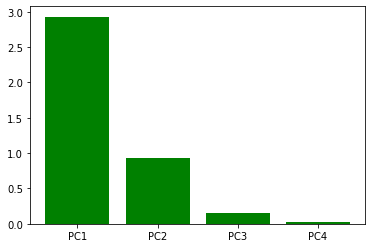

In [94]:
eigenvectors1, eigenvalues1 = pca1.components_, pca1.explained_variance_
plt.bar(np.array([1,2,3,4]), eigenvalues1, color = 'green')
plt.xticks(np.array([1,2,3,4]), ('PC1', 'PC2', 'PC3', 'PC4'))
plt.show()

In [97]:
# Apply the same steps as we did for the iris data but at the end, plot the orginal data (not the projected data) First, compute the 2 PCs

In [98]:
# Extract and display the eigenvalues, eigenvectors

In [99]:
# Plot the original data with the eigenvectors